# Prediction of diagnosis of cervical cancer

The dataset was collected at 'Hospital Universitario de Caracas' in Caracas, Venezuela. For more information you can also check this url
: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29#

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

C:\Users\Anna\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df=pd.read_csv("Cancer.csv", sep=",")

In [3]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
# Calculating nulls, which named as '?'.
df[df=='?'].count()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [5]:
# Replacing missing values with NAN.
df = df.replace('?', np.nan)

In next step I fill NAN. The continuous variables will fill the median value. The categoriacal variables will fill 0 or 1. In many cases I selected 1, because I supposed that responder was trying to hide the information about shameful ailments or activity. So for: Smokes, Hormonal Contraceptives, STDs (Sexually transmitted diseases) I choosed 1. For features: IUD and IUD (years) I choosed 0. Abbreviation of IUD means Intrauterine contraceptive device and it's not common method of contraception. 

In [6]:
df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].median())
df['First sexual intercourse'] = df['First sexual intercourse'].fillna(df['First sexual intercourse'].median())
df['Num of pregnancies'] = df['Num of pregnancies'].fillna(df['Num of pregnancies'].median())
df['Smokes'] = df['Smokes'].fillna(1)
df['Smokes (years)'] = df['Smokes (years)'].fillna(df['Smokes (years)'].median())
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median())
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].fillna(1)
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median())
df['IUD'] = df['IUD'].fillna(0) # in my opinion
df['IUD (years)'] = df['IUD (years)'].fillna(0) 
df['STDs'] = df['STDs'].fillna(1)
df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].median())
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].median())
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].median())
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].median())
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].median())
df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].median())
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].median())
df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].median())
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].median())
df['STDs:AIDS'] = df['STDs:AIDS'].fillna(df['STDs:AIDS'].median())
df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].median())
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].median())
df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].median())
df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].fillna(df['STDs: Time since first diagnosis'].median())
df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].fillna(df['STDs: Time since last diagnosis'].median())

In [7]:
df = pd.get_dummies(data=df, columns=['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

In [8]:
df.describe()

,Age,STDs: Number of diagnosis,Biopsy,Smokes_1,Smokes_0.0,Smokes_1.0,Hormonal Contraceptives_1,Hormonal Contraceptives_0.0,Hormonal Contraceptives_1.0,IUD_0,...,Dx:HPV_0,Dx:HPV_1,Dx_0,Dx_1,Hinselmann_0,Hinselmann_1,Citology_0,Citology_1,Schiller_0,Schiller_1
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.064103,0.015152,0.841492,0.143357,0.125874,0.313520,0.560606,0.136364,...,0.979021,0.020979,0.972028,0.027972,0.959207,0.040793,0.948718,0.051282,0.913753,0.086247
std,8.497948,0.302545,0.245078,0.122227,0.365430,0.350641,0.331901,0.464194,0.496603,0.343374,...,0.143398,0.143398,0.164989,0.164989,0.197925,0.197925,0.220701,0.220701,0.280892,0.280892
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


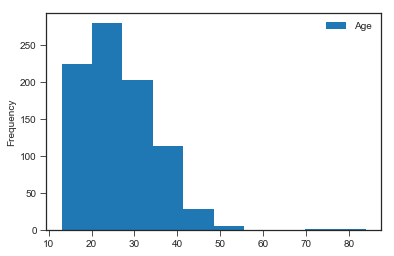

In [9]:
df[['Age']].plot.hist()

For a building model I will aplly Grid Search method. GS helps evaluate optimal values of hyperparameter for a given model.

In [10]:
# Splitting the dataset into the Training set and Test set.
X=df.drop('Biopsy', axis=1)
y=df['Biopsy']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
# Feature Scaling.
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)
# Applying Grid Search to find the best model and the best parameters. 
param_grid = {'C': [ 1, 10, 15], 'gamma':np.power(10, np.arange(-2.0, 2.1, 0.2)),'kernel': ['rbf', 'linear', 'poly']}
grid = GridSearchCV(SVC(), param_grid, scoring='roc_auc', cv=10)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 15], 'gamma': array([1.00000e-02, 1.58489e-02, 2.51189e-02, 3.98107e-02, 6.30957e-02,
       1.00000e-01, 1.58489e-01, 2.51189e-01, 3.98107e-01, 6.30957e-01,
       1.00000e+00, 1.58489e+00, 2.51189e+00, 3.98107e+00, 6.30957e+00,
       1.00000e+01, 1.58489e+01, 2.51189e+01, 3.98107e+01, 6.30957e+01,
       1.00000e+02]), 'kernel': ['rbf', 'linear', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [11]:
print("Best parameters are:")
print(grid.best_estimator_)
best_gamma = grid.best_params_['gamma']
best_C = grid.best_params_['C']
print('Best score = %f (gamma=%f, C=%f)' % (grid.best_score_, best_gamma, best_C))

Best parameters are:
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best score = 0.959971 (gamma=0.010000, C=1.000000)


In [12]:
prediction = grid.best_estimator_.predict(X_test_scaled)
# Creating a dataframe for prediction and correct answer.
df_com = pd.DataFrame({'Biopsy' :np.array(y_test)})
df_com['Prediction'] = prediction
df_com

,Biopsy,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,0,0


In [13]:
# Making the Confusion Matrix.
pd.DataFrame(confusion_matrix(y_test,prediction),columns=['Negative','Positive'],index=['Negative','Positive'])

,Negative,Positive
Negative,163,3
Positive,1,5


In [14]:
# Calculating the ratio of correctly predicted positive observations to the all observations in actual class.
recall_score(y_test,prediction) 

0.8333333333333334

In [15]:
# Caluculating the ratio of correctly predicted positive observations to the total predicted positive  observations.
precision_score(y_test,prediction) 

0.625

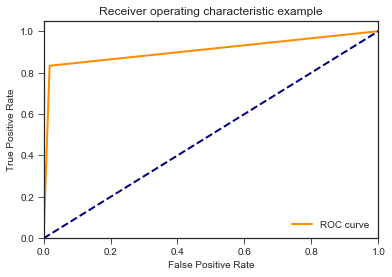

In [16]:
# Visualising the Receiver operating characteristic.
fpr, tpr, _ = roc_curve(y_test,prediction)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [17]:
# Calculating the ratio of correctly predicted observation to the total observations.
auc(fpr, tpr)

0.9076305220883535